In [2]:
import sys
import numpy as np
import pandas as pd
import imageio as iio
import matplotlib.pyplot as plt

In [16]:
# path = "/dhc/groups/fglippert/Ukbiobank/imaging/retinal_fundus/multisources/source1/trainset/"
path = "/dhc/groups/fglippert/MorphoMNIST/mnist_instances/mnist_thickness_intensity_slant/trainset/"
labels = pd.read_json(path + "dataset.json")

In [17]:
labels.head()

,labels
0,"[00000/img00000000.png, {'thickness': 1.721891..."
1,"[00000/img00000001.png, {'thickness': 1.901526..."
2,"[00000/img00000002.png, {'thickness': 2.261749..."
3,"[00000/img00000003.png, {'thickness': 2.643644..."
4,"[00000/img00000004.png, {'thickness': 2.228016..."


In [18]:
labels = labels["labels"]

In [19]:
labels[0]

['00000/img00000000.png',
 {'thickness': 1.7218915,
  'intensity': 92.833786,
  'slant': -19.565132,
  'label': 5.0}]

In [20]:
labels.view()

0        [00000/img00000000.png, {'thickness': 1.721891...
1        [00000/img00000001.png, {'thickness': 1.901526...
2        [00000/img00000002.png, {'thickness': 2.261749...
3        [00000/img00000003.png, {'thickness': 2.643644...
4        [00000/img00000004.png, {'thickness': 2.228016...
                               ...                        
59995    [00059/img00059995.png, {'thickness': 2.320530...
59996    [00059/img00059996.png, {'thickness': 2.050987...
59997    [00059/img00059997.png, {'thickness': 2.279041...
59998    [00059/img00059998.png, {'thickness': 2.466858...
59999    [00059/img00059999.png, {'thickness': 2.560512...
Name: labels, Length: 60000, dtype: object

In [21]:
all_labels = pd.DataFrame(columns=["img"] + list(labels[0][1].keys()))
for i in range(10000):
    single = []
    single.append(labels[2000 + i][0])
    for key in labels[2000 + i][1].keys():
        single.append(labels[2000 + i][1][key])
    all_labels.loc[i] = single

In [22]:
all_labels.head()

,img,thickness,intensity,slant,label
0,00002/img00002000.png,2.365273,124.47400,31.166275,5.0
1,00002/img00002001.png,3.817656,243.39507,54.194153,8.0
2,00002/img00002002.png,2.685617,196.95844,7.615541,8.0
3,00002/img00002003.png,2.667334,137.91263,28.846622,4.0
4,00002/img00002004.png,3.023855,190.03264,-10.669834,2.0


In [23]:
### take only one class (e.g. 2)
labels = all_labels[all_labels["label"] == 8]
# ### sort by slant
labels = labels.sort_values(by=["thickness"])

In [24]:
labels.iloc[500:800]

,img,thickness,intensity,slant,label
5436,00007/img00007436.png,2.482273,183.99911,8.648846,8.0
9942,00011/img00011942.png,2.482724,154.44382,31.268570,8.0
1003,00003/img00003003.png,2.483425,127.73434,7.649857,8.0
2305,00004/img00004305.png,2.484479,160.84802,20.944988,8.0
3281,00005/img00005281.png,2.487306,164.65352,-2.009965,8.0
...,...,...,...,...,...
170,00002/img00002170.png,3.111752,209.00612,22.478096,8.0
9586,00011/img00011586.png,3.112784,211.11499,43.057360,8.0
2803,00004/img00004803.png,3.116206,203.24164,33.517990,8.0
6867,00008/img00008867.png,3.116811,234.88979,42.762657,8.0


In [25]:
# labels.describe()

In [26]:
ll = labels.iloc[::4]

In [27]:
ll.describe()
# all_labels

,thickness,intensity,slant,label
count,239.000000,239.000000,239.000000,239.0
mean,2.516066,159.758057,0.580621,8.0
std,0.622993,48.351883,28.975276,0.0
min,1.118751,71.599750,-53.197580,8.0
25%,2.069340,122.286990,-23.195955,8.0
50%,2.439950,155.259060,-1.379963,8.0
75%,2.898908,201.228205,25.380989,8.0
max,4.497397,251.501130,54.547085,8.0


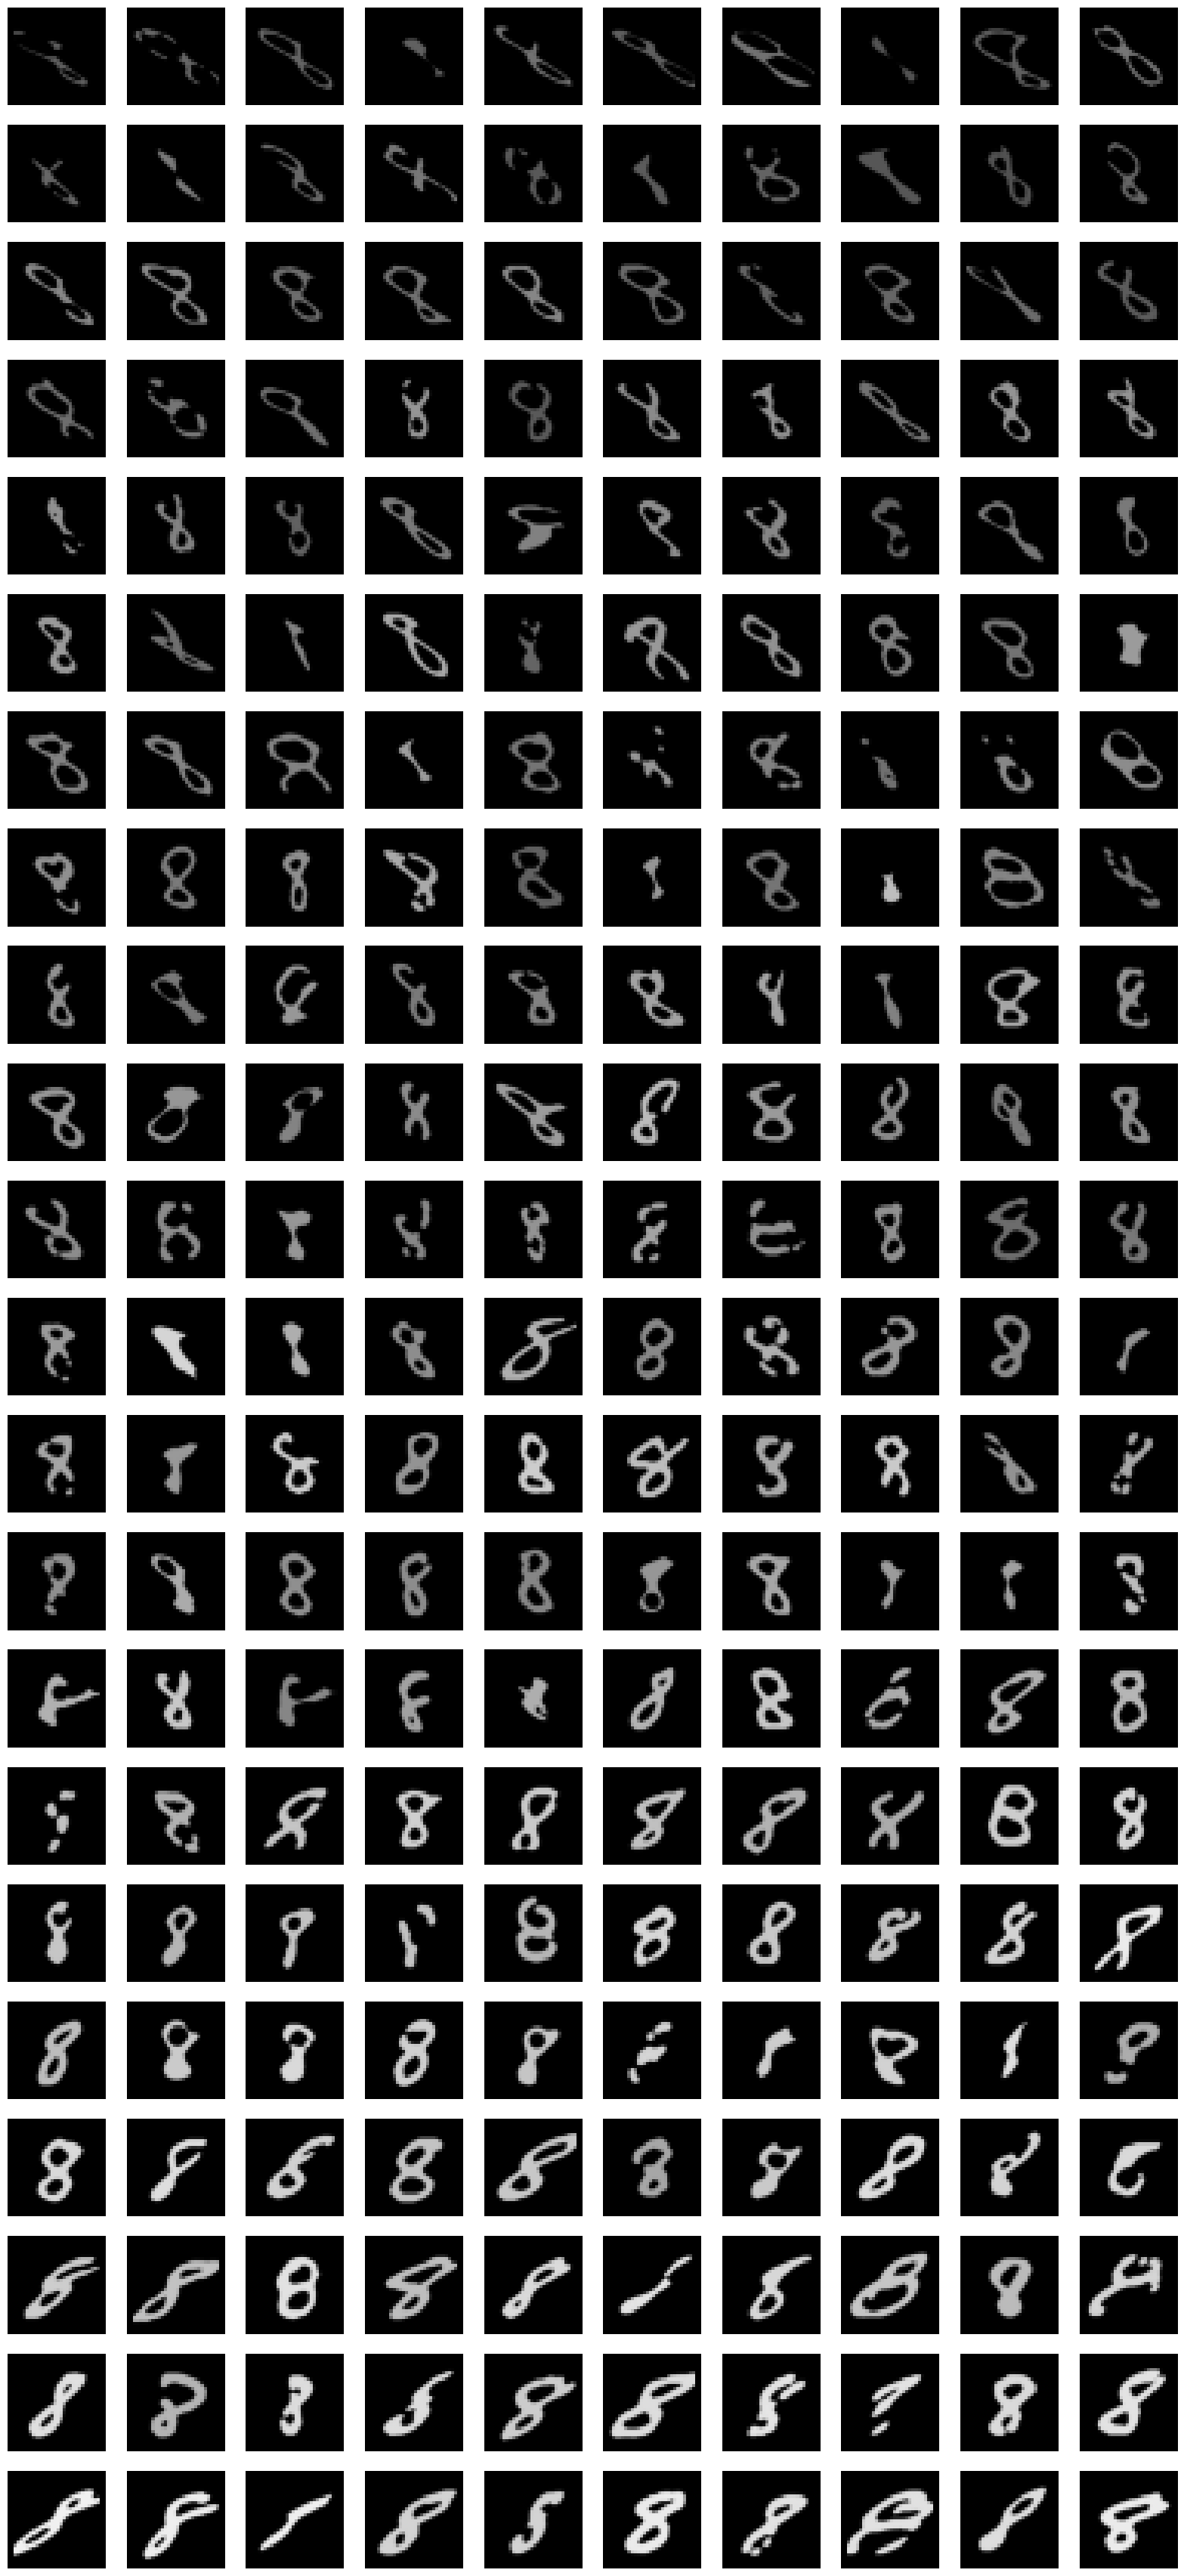

In [33]:
ncols = 10
nrows = 22
plt.figure(figsize=(ncols * 2, nrows * 2))
for i in range(nrows):
    for j in range(ncols):
        img_path = path + ll.iloc[i * ncols + j]["img"]
        img = iio.imread(img_path)
        img = np.asarray(img, dtype=np.float32)
        img = (img - 0) * (255 / (255 - 0))
        img = np.rint(img).clip(0, 255).astype(np.uint8)
        plt.subplot(nrows, ncols, i * ncols + j + 1)
        # plt.imshow(img, vmin=0, vmax=255)
        plt.imshow(img, cmap="gray", vmin=0, vmax=255)
        plt.axis("off")

In [177]:
ll_slant = np.deg2rad(ll["slant"].values)

In [178]:
ll_slant

array([-0.63980135, -0.63569701, -0.59217058, -0.55727878, -0.57304657,
       -0.55890651, -0.54829531, -0.48676659, -0.53362461, -0.5058527 ,
       -0.51125371, -0.47808329, -0.50305941, -0.49120714, -0.44558361,
       -0.4830279 , -0.47553717, -0.46135082, -0.43330446, -0.46981185,
       -0.44237496, -0.43843758, -0.46198797, -0.42293119, -0.44978627,
       -0.42721632, -0.42009742, -0.44508078, -0.38687188, -0.38150768,
       -0.39379728, -0.41719516, -0.38434506, -0.37822257, -0.4067804 ,
       -0.40009893, -0.37212148, -0.372659  , -0.36973261, -0.38604344,
       -0.36510736, -0.3826551 , -0.38918547, -0.34809866, -0.38644914,
       -0.36242526, -0.37715651, -0.36672024, -0.3590984 , -0.33829692,
       -0.34887268, -0.37156311, -0.31990307, -0.35569327, -0.32293434,
       -0.30529313, -0.32946036, -0.34449759, -0.32755338, -0.31737017,
       -0.31792059, -0.32408354, -0.30471679, -0.32468304, -0.32653061,
       -0.29171555, -0.33160053, -0.28682114, -0.31394461, -0.31

In [179]:
ll["slant"].values

array([-36.657917  , -36.422756  , -33.928875  , -31.929722  ,
       -32.83315   , -32.022984  , -31.415007  , -27.889671  ,
       -30.574438  , -28.983225  , -29.29268   , -27.392155  ,
       -28.823181  , -28.144096  , -25.53006   , -27.67546   ,
       -27.246273  , -26.433455  , -24.826517  , -26.918236  ,
       -25.346218  , -25.120623  , -26.469961  , -24.232172  ,
       -25.770855  , -24.477692  , -24.069809  , -25.50125   ,
       -22.166126  , -21.85878   , -22.562922  , -23.903522  ,
       -22.02135   , -21.670557  , -23.3068    , -22.92398   ,
       -21.32099   , -21.351788  , -21.184118  , -22.11866   ,
       -20.919111  , -21.924522  , -22.298685  , -19.944584  ,
       -22.141905  , -20.765438  , -21.609476  , -21.011522  ,
       -20.574823  , -19.382986  , -19.988932  , -21.288998  ,
       -18.329096  , -20.379723  , -18.502775  , -17.492008  ,
       -18.876688  , -19.738258  , -18.767426  , -18.183971  ,
       -18.215508  , -18.568619  , -17.458986  , -18.60

In [11]:
sys.path.append("/dhc/home/wei-cheng.lai/projects/causal_gans/stylegan3/")
from metrics import metric_main
from morphoswithmnist.morphomnist import io, measure
from morphoswithmnist.morphomnist.morpho import ImageMorphology, ImageMoments

image_path = "/dhc/home/wei-cheng.lai/data/MNIST/raw/t10k-images-idx3-ubyte.gz"
images = io.load_idx(image_path)

/dhc/home/wei-cheng.lai/conda3/envs/stylegan3_test/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


No CUDA runtime is found, using CUDA_HOME='/dhc/home/wei-cheng.lai/conda3/envs/stylegan3_test'


In [20]:
deg = []
rad = []
for i in np.arange(-180, 190, 10):
    deg.append(i)
    rad.append(np.deg2rad(i))

In [29]:
angle = np.arctan(deg)
print(angle)
print(np.arctan(rad))

[-1.56524083 -1.56491404 -1.56454641 -1.56412976 -1.56365359 -1.56310417
 -1.56246319 -1.56170567 -1.56079666 -1.55968567 -1.55829698 -1.55651158
 -1.5541312  -1.55079899 -1.54580153 -1.53747533 -1.52083793 -1.47112767
  0.          1.47112767  1.52083793  1.53747533  1.54580153  1.55079899
  1.5541312   1.55651158  1.55829698  1.55968567  1.56079666  1.56170567
  1.56246319  1.56310417  1.56365359  1.56412976  1.56454641  1.56491404
  1.56524083]
[-1.26262726 -1.24571888 -1.226925   -1.20592739 -1.18233656 -1.15567236
 -1.12533883 -1.09059189 -1.05049817 -1.00388482 -0.94928224 -0.88486958
 -0.80844879 -0.71750578 -0.60947097 -0.48234791 -0.33584237 -0.17279243
  0.          0.17279243  0.33584237  0.48234791  0.60947097  0.71750578
  0.80844879  0.88486958  0.94928224  1.00388482  1.05049817  1.09059189
  1.12533883  1.15567236  1.18233656  1.20592739  1.226925    1.24571888
  1.26262726]


In [23]:
tans = -np.tan(rad)

In [24]:
tans

array([-1.22464680e-16, -1.76326981e-01, -3.63970234e-01, -5.77350269e-01,
       -8.39099631e-01, -1.19175359e+00, -1.73205081e+00, -2.74747742e+00,
       -5.67128182e+00,  1.63312394e+16,  5.67128182e+00,  2.74747742e+00,
        1.73205081e+00,  1.19175359e+00,  8.39099631e-01,  5.77350269e-01,
        3.63970234e-01,  1.76326981e-01, -0.00000000e+00, -1.76326981e-01,
       -3.63970234e-01, -5.77350269e-01, -8.39099631e-01, -1.19175359e+00,
       -1.73205081e+00, -2.74747742e+00, -5.67128182e+00, -1.63312394e+16,
        5.67128182e+00,  2.74747742e+00,  1.73205081e+00,  1.19175359e+00,
        8.39099631e-01,  5.77350269e-01,  3.63970234e-01,  1.76326981e-01,
        1.22464680e-16])

0 before:
Area: 71.1
Length: 33.7
Thickness: 2.15
Slant: 4°
Dimensions: 15.1 x 19.6
0 after1:
Area: 92.9
Length: 34.7
Thickness: 2.63
Slant: 11°
Dimensions: 16.7 x 19.9
0 after2:
Area: 112.3
Length: 35.5
Thickness: 3.17
Slant: 2°
Dimensions: 14.6 x 19.1
0 after3:
Area: 98.8
Length: 35.5
Thickness: 2.77
Slant: 2°
Dimensions: 14.4 x 19.3
0 after4:
Area: 138.9
Length: 37.3
Thickness: 3.82
Slant: 8°
Dimensions: 14.3 x 20.3


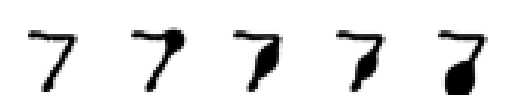

In [20]:
from morphoswithmnist.morphomnist.perturb import Swelling
pert1 = Swelling(strength=3, radius=7)
pert2 = Swelling(strength=3, radius=10)
pert3 = Swelling(strength=3, radius=8)
pert4 = Swelling(strength=5, radius=10)
for n in range(1):
    print(n, "before:")
    measure.measure_image(images[n], verbose=True)

    morph = ImageMorphology(images[n], scale=16)
    pert_hires_image = pert1(morph)
    pert_image1 = morph.downscale(pert_hires_image)

    print(n, "after1:")
    measure.measure_image(pert_image1, verbose=True)

    morph = ImageMorphology(images[n], scale=16)
    pert_hires_image = pert2(morph)
    pert_image2 = morph.downscale(pert_hires_image)
    print(n, "after2:")
    measure.measure_image(pert_image2, verbose=True)

    morph = ImageMorphology(images[n], scale=16)
    pert_hires_image = pert3(morph)
    pert_image3 = morph.downscale(pert_hires_image)
    print(n, "after3:")
    measure.measure_image(pert_image3, verbose=True)

    morph = ImageMorphology(images[n], scale=16)
    pert_hires_image = pert4(morph)
    pert_image4 = morph.downscale(pert_hires_image)

    print(n, "after4:")
    measure.measure_image(pert_image4, verbose=True)

    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
    ax1.imshow(images[n], cmap='gray_r')
    ax2.imshow(pert_image1, cmap='gray_r')
    ax3.imshow(pert_image2, cmap='gray_r')
    ax4.imshow(pert_image3, cmap='gray_r')
    ax5.imshow(pert_image4, cmap='gray_r')
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    ax4.axis('off')
    ax5.axis('off')
    plt.show()
    print()

0 before:
Area: 71.1
Length: 33.4
Thickness: 2.14
Slant: 4°
Dimensions: 15.1 x 19.6
0 after:
Area: 60.4
Length: 46.0
Thickness: 1.52
Slant: 52°
Dimensions: 14.8 x 17.0


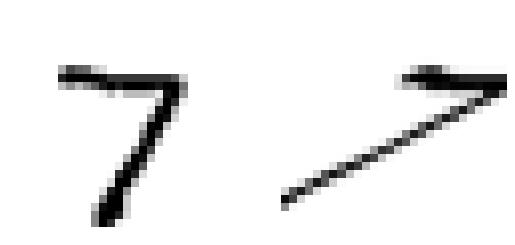


1 before:
Area: 112.8
Length: 46.0
Thickness: 2.57
Slant: -10°
Dimensions: 17.6 x 19.9
1 after:
Area: 89.8
Length: 59.2
Thickness: 1.78
Slant: 52°
Dimensions: 17.1 x 18.7


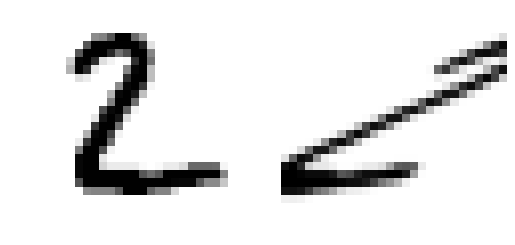

In [13]:
from morphoswithmnist.morphomnist.transforms import SetThickness, SetSlant
pert = SetSlant(np.deg2rad(56))
for n in range(2):
    print(n, "before:")
    measure.measure_image(images[n], verbose=True)

    morph = ImageMorphology(images[n], scale=16)
    pert_hires_image = pert(morph)
    pert_image = morph.downscale(pert_hires_image)

    print(n, "after:")
    measure.measure_image(pert_image, verbose=True)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(images[n], cmap='gray_r')
    ax2.imshow(pert_image, cmap='gray_r')
    ax1.axis('off')
    ax2.axis('off')
    plt.show()
    print()